In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('MarketData.csv')
for col in df.columns:
    print(col)

df.info()  

Date
Open
High
Low
Close
Adj Close
Volume
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5232 entries, 0 to 5231
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5232 non-null   object 
 1   Open       5232 non-null   float64
 2   High       5232 non-null   float64
 3   Low        5232 non-null   float64
 4   Close      5232 non-null   float64
 5   Adj Close  5232 non-null   float64
 6   Volume     5232 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 286.2+ KB


In [2]:
df["Date"] = pd.to_datetime(df["Date"])
df.info()  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5232 entries, 0 to 5231
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       5232 non-null   datetime64[ns]
 1   Open       5232 non-null   float64       
 2   High       5232 non-null   float64       
 3   Low        5232 non-null   float64       
 4   Close      5232 non-null   float64       
 5   Adj Close  5232 non-null   float64       
 6   Volume     5232 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 286.2 KB


In [3]:
df.set_index("Date", inplace=True)
resultDf = df.groupby([df.index.year, df.index.month]).agg(["first", "last"])
resultDf["new_column"] = (resultDf[("Close", "last")] / resultDf[("Open", "first")])-1
resultDf.index.rename(["year", "month"], inplace=True)
resultDf.reset_index(inplace=True)
resultDf
#saved data as monthly return
#resultDf.to_csv('monthly_return.csv')

year month         Open                      High               \
                       first         last        first         last   
0    2000     1  1469.250000  1360.160034  1478.000000  1394.479980   
1    2000     2  1394.459961  1348.050049  1412.489990  1369.630005   
2    2000     3  1366.420044  1487.920044  1383.459961  1519.810059   
3    2000     4  1498.579956  1464.920044  1507.189941  1473.619995   
4    2000     5  1452.430054  1422.439941  1481.510010  1434.489990   
..    ...   ...          ...          ...          ...          ...   
245  2020     6  3038.780029  3050.199951  3062.179932  3111.510010   
246  2020     7  3105.919922  3270.449951  3128.439941  3272.169922   
247  2020     8  3288.260010  3509.729980  3302.729980  3514.770020   
248  2020     9  3507.439941  3341.209961  3528.030029  3393.560059   
249  2020    10  3385.870117  3493.500000  3397.179932  3515.760010   

             Low                     Close                 Adj Close  \
           first         last        first         last        first   
0    1438.359985  1350.140015  1455.219971  1394.459961  1455.219971   
1    1384.790039  1348.050049  1409.280029  1366.420044  1409.280029   
2    1366.420044  1484.380005  1379.189941  1498.579956  1379.189941   
3    1486.959961  1448.150024  1505.969971  1452.430054  1505.969971   
4    1452.430054  1415.500000  1468.250000  1420.599976  1468.250000   
..           ...          ...          ...          ...          ...   
245  3031.540039  3047.830078  3055.729980  3100.290039  3055.729980   
246  3101.169922  3220.260010  3115.860107  3271.120117  3115.860107   
247  3284.530029  3493.250000  3294.610107  3500.310059  3294.610107   
248  3494.600098  3340.469971  3526.649902  3363.000000  3526.649902   
249  3361.389893  3480.449951  3380.800049  3483.810059  3380.800049   

                      Volume             new_column  
            last       first        last             
0    1394.459961   931800000   993800000  -0.050904  
1    1366.420044   981000000  1204300000  -0.020108  
2    1498.579956  1274100000  1227400000   0.096720  
3    1452.430054  1021700000   984600000  -0.030796  
4    1420.599976   966300000   960500000  -0.021915  
..           ...         ...         ...        ...  
245  3100.290039  4673410000  4696280000   0.020242  
246  3271.120117  4443130000  5117260000   0.053189  
247  3500.310059  4643640000  4342290000   0.064487  
248  3363.000000  4083110000  4722530000  -0.041181  
249  3483.810059  4070530000  4675890000   0.028926  

[250 rows x 15 columns]

In [4]:
dfM = pd.read_csv('monthly_return.csv')   
for col in dfM.columns:
    print(col)
#labeled positive return as 1 and negative return as 0    
prediction = []
for value in dfM["new_column"]:
    if value >= 0:
        prediction.append("1")  #1 means profitable
    
    else:
        prediction.append("0")   #0 means non-profitable

Unnamed: 0
year
month
Open
Open1
High
High1
Low
Low1
Close
Close1
Adj Close
Adj Close1
Volume
Volume1
new_column
profit-nonprofit


classification using decission tree

In [5]:
df = pd.read_csv("monthly_return.csv")

In [6]:
df.head()
df.dropna(inplace=True)
#df = df.drop(['new_column'], axis=1) 

In [7]:
inputs = df.drop('profit-nonprofit',axis='columns')

target=df['profit-nonprofit']

<AxesSubplot:xlabel='profit-nonprofit', ylabel='count'>

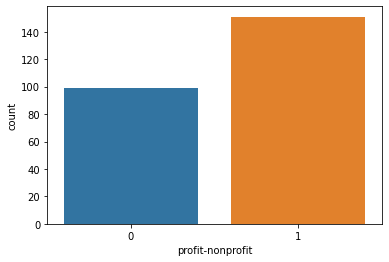

In [8]:
df['profit-nonprofit'].value_counts()
import seaborn as sns
sns.countplot(x="profit-nonprofit", data=df) 

In [9]:
#Define the dependent variable that needs to be predicted
y = df["profit-nonprofit"].values

In [10]:
#Define the independent variables. Let's also drop Gender, so we can normalize other data
X = df.drop(labels = ["profit-nonprofit"], axis=1) 

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X1 = scaler.transform(X)

In [12]:
#machine learning based prediction
from sklearn.model_selection import KFold
from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(X1,y)

DecisionTreeClassifier()

0.9733333333333334


<AxesSubplot:>

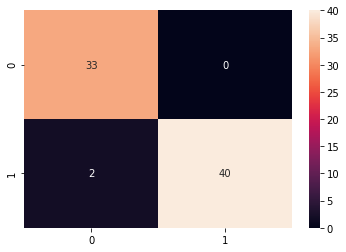

In [13]:
#Split data into train and test to verify accuracy after fitting the model. 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.30)

tree = model.fit(X_train, y_train)
predictions = model.predict(X_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, predictions))

from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True)

In [17]:
#kfold_validation=KFold(10)

from sklearn.model_selection import StratifiedKFold
kfold_validation=StratifiedKFold(5)

from sklearn.model_selection import cross_val_score
results=cross_val_score(model,X1,y,cv=kfold_validation)
print(results)
import numpy as np
print(np.mean(results))

[1.   0.96 1.   1.   1.  ]
0.992


In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import roc_curve, roc_auc_score, auc

[1.0, 0.9666666666666667, 1.0, 1.0, 1.0]


<ipython-input-19-497d78c9bdcf>:10: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-19-497d78c9bdcf>:10: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-19-497d78c9bdcf>:10: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-19-497d78c9bdcf>:10: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-19-497d78c9bdcf>:10: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


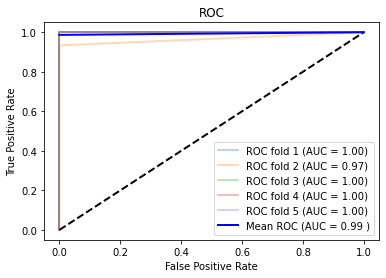

In [19]:
from scipy import interp
cv = StratifiedKFold(n_splits=5)
tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
for train,test in cv.split(X1,y):
    prediction = model.fit(X1[train],y[train]).predict_proba(X1[test])
    fpr, tpr, t = roc_curve(y[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

print(aucs)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
#plt.text(0.32,0.7,'More accurate area',fontsize = 12)
#plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()